ELEC-E8105 

Non-linear filtering and parameter estimation Spring 2019

Erkka Tahvanainen

K80343

Exercise round 8

# Exercise 1. (RTS Smoother with Non-Zero Mean Noises)

Derive the Kalman lter equations for the following linear-Gaussian ltering
model with non-zero-mean noises:

$$x_k = Ax_{k-1}+q_{k-1}$$
$$y_k = Hx_k + r_k$$

where $q_{k-1} \sim N(m_q,Q)$ and $r_k \sim N(m_r,R)$


$q_{k-1} $ is process noise

$r_k$ is white measurement noise

$A_{k-1}$ is transition matrix fo the dynamic model

$H_k$ is measurement model matrix

In probabilistic terms the model is

$p(x_0) = N(m,P)$

$p(x_k|x_{k-1} = N(x_k|Ax_{k-1}+m_q,Q)$

$p(y_k|x_k)  = N(y_k|Hx_k +m_r,R)$

**Kalman Filter**

We assume that we know

$p(x_{k-1}|y_{1:k-1}) = N(x_{k-1}|m_{k-1},P_{k-1})$

Gaussian probability density

$N(x|m,P) = \frac{1}{(2\pi)^{n/2}(|P|)^{1/2}}exp(-\frac{1}{2}(x-m)^TP^{-1}(x-m))$

$p(x_k) = N(x_k|Am+m_q,APA^T+Q) , p(y_k|x_k) = N(y_k|Hx_k+m_q, R),$

then the joint distribution of x and y is

$  \begin{pmatrix}
  x  \\
  y
  \end{pmatrix} \sim N\bigg( \begin{pmatrix}
  Am + m_q \\
  H(m +m_q)+ m_r
  \end{pmatrix},\begin{pmatrix}
  APA^T+Q& (APA^T+Q)H^T  \\
  H(APA^T+Q) & H(APA^T+Q)H^T +  R
  \end{pmatrix}\bigg)$
  
and the marginal distribution of y is

$ y  \sim N(H(m+m_q)+m_r, HQPQ^TH^T+R). $

$  \begin{pmatrix}
  x  \\
  y
  \end{pmatrix} \sim N\bigg( \begin{pmatrix}
  a  \\
 b
  \end{pmatrix},\begin{pmatrix}
  A& C \\
C^T & B  \end{pmatrix}\bigg)$

$x \sim N(a,A)$

$y \sim N(b,B)$

$x|y \sim N(a+CB^{-1}(y-b),A-CB^{-1}C^T)$

$y|x \sim N(b+C^TA^{-1}(x-a),B-C^TA^{-1}C)$

Prediction step

$p(x_k|y_{1:k-1}) = N(x_k|m_k^-,P_k^-)$

$m_k^{-} = Am_{k-1} + m_q$

$P_{k}^{-} = AP_{k-1}A^T +Q$

Update step

$p(x_k,y_k|y_{1:k-1}) =  N\bigg( \begin{pmatrix}
  x_k\\
  y_k
  \end{pmatrix},m^{''},P^{''}\bigg)$
  
$m^{''} = \begin{pmatrix}
  m_k^- \\
  Hm_k^-+ m_r
  \end{pmatrix}$
  
  
$P^{''} = \begin{pmatrix}
  P_k^- & P_k^-H^T\\
  HP_k^- & HP^-H^T + R
  \end{pmatrix}$

Conditional is given as

$p(x_k|y_k,y_{1:k-1}) = p(x_k|y_{1:k})=N(x_k|m_k,P_k)$

where

$ S_k = HP_k^-H^T + R$

$ K_k = P_k^- H^T S_k^{-1}$

$m_k  = m_k^- + K_k[y_k -Hm_k^- -m_r]$

$P_k = P_k^- -K_kS_kK_k^T$


**Smoother**

Kalman filter can compute

$p(x_k \mid y_{1:k} ) = N(x_k \mid m_k , P_k )$

$p(x) = N(x \mid m + m_q,P)$

$p(y \mid x) = N(y \mid Hx + m_r,R)$


$  \begin{pmatrix}
  x  \\
  y
  \end{pmatrix} \sim N\bigg( \begin{pmatrix}
  m + m_q \\
  H(m +m_q)+ m_r
  \end{pmatrix},\begin{pmatrix}
  P+Q& (P+Q)H^T  \\
  H(P+Q) & H(P+Q)H^T +  R
  \end{pmatrix}\bigg)$
  
 and the marginal distribution of y is

$ y  \sim N(H(m+m_q)+m_r, H(P+Q)H^T+R). $

Using Guassian distribution computation rules we get

$p(x_k, x_{k+1} \mid y_{1:k} ) = p(x_{k+1} \mid x_k ) p(x_k \mid y_{1:k} )
= N(x_{k+1} \mid A x_k + m_q ,Q ) N(x_k \mid m_k + m_q ,P_k ) = N( \begin{pmatrix}
 x_k   \\
  x_{k+1}
  \end{pmatrix}\mid m_1,P_1) $

where

$m_1 = \begin{pmatrix}
  m_k+m_q \\
  A(m_k+m_q)+m_r
  \end{pmatrix} , P_1 =  \begin{pmatrix}
  P_k & P_kA^T  \\
  AP_k & AP_KA^T +Q
  \end{pmatrix} $


$m_{k+1}^{-} = Am_{k} + m_q$

$P_{k+1}^{-} = AP_{k}A^T +Q$


$ G_k = P_k^- A^T [P_{k+1}^{-}]^{-1}$

$m_k^s  = m_k + G_k[m_{k+1}^s -m_{k+1}^-]$

$P_k^s = P_k -G_k[P_{k+1}^s - P_{k+1}^-]G_k^T$

# Exercise 2. (Smoother for Gaussian Random Walk)


Implement the Gaussian random walk model smoother in Example 8.1 (in
the book) and compare its performance to the corresponding Kalman lter.
Plot the evolution of the mean and covariance of the smoothing distribution
and compare them to the mean and covariance of the Kalman lter.

$x_k = x_{k-1} + q_{k-1}, q_{k-1} \sim N(0,Q)$

$y_k = x_k + r_k , r_k \sim N(0,R)$

In [153]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

N = 100
Q = 1
R = 1
x_k = np.zeros(N)
y_k = np.zeros(N)
x_k[0] = 0
y_k[0] = 0
for i in range(1,N):
    x_k[i]  = x_k[i-1] + np.random.normal(0,Q)
    y_k[i]  = x_k[i] + np.random.normal(0,R)

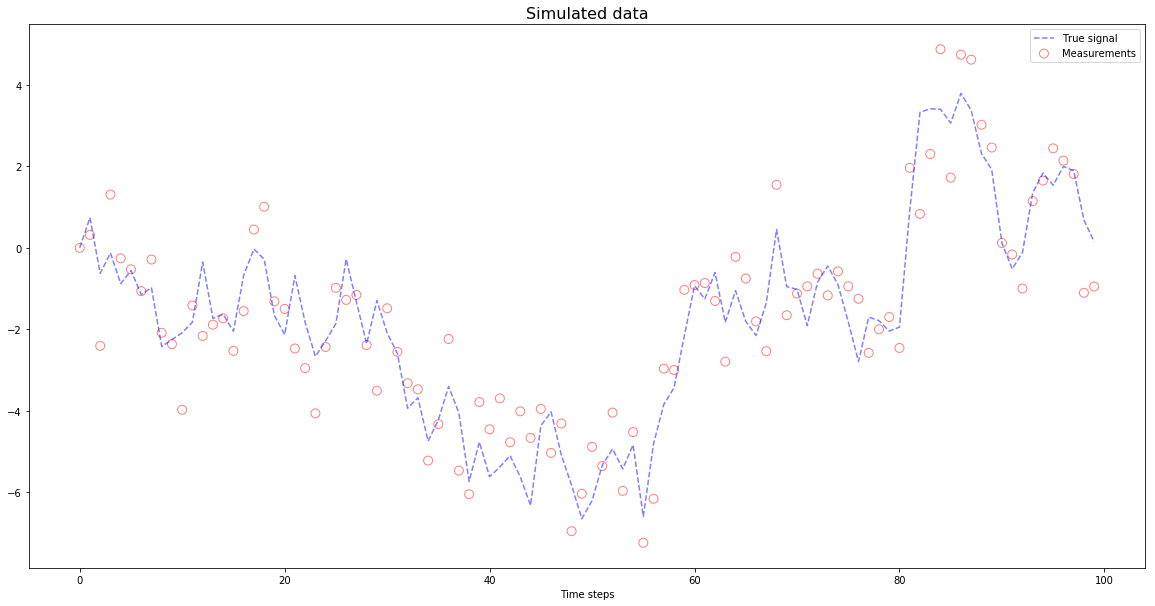

In [154]:
t = np.linspace(0,N-1,N)
plt.figure(figsize=(20,10))
plt.title("Simulated data", fontsize=16)
plt.scatter(x=t,y=y_k.flatten(),label = 'Measurements',s=80, facecolors='none', edgecolors='r',alpha=0.5)
plt.plot(t,x_k,label = "True signal",linestyle='--',color='b',alpha=0.5)
plt.xlabel('Time steps')
plt.legend()
plt.show()

In [171]:

A = np.array([[1]])
H = np.array([[1]])
Q = np.array([[1]])
R = np.array([[1]])
m_k = np.zeros((N,1))
P_k = np.zeros((N,1))
m_k[0] = np.array([[0]])
P_k[0] = np.array([[1]])

for k in range(1,N):
    m_k_ = A @ m_k[k-1]
    P_k_ = A@ P_k[k-1] @A.T + Q
    v_k = y_k[k] - H@m_k_
    S_k = H@P_k_@H.T + R
    K_k = P_k_@H.T@ np.linalg.inv(S_k)
    m_k[k] = m_k_ + K_k @ v_k
    P_k[k] = P_k_ - K_k @ S_k @ K_k.T

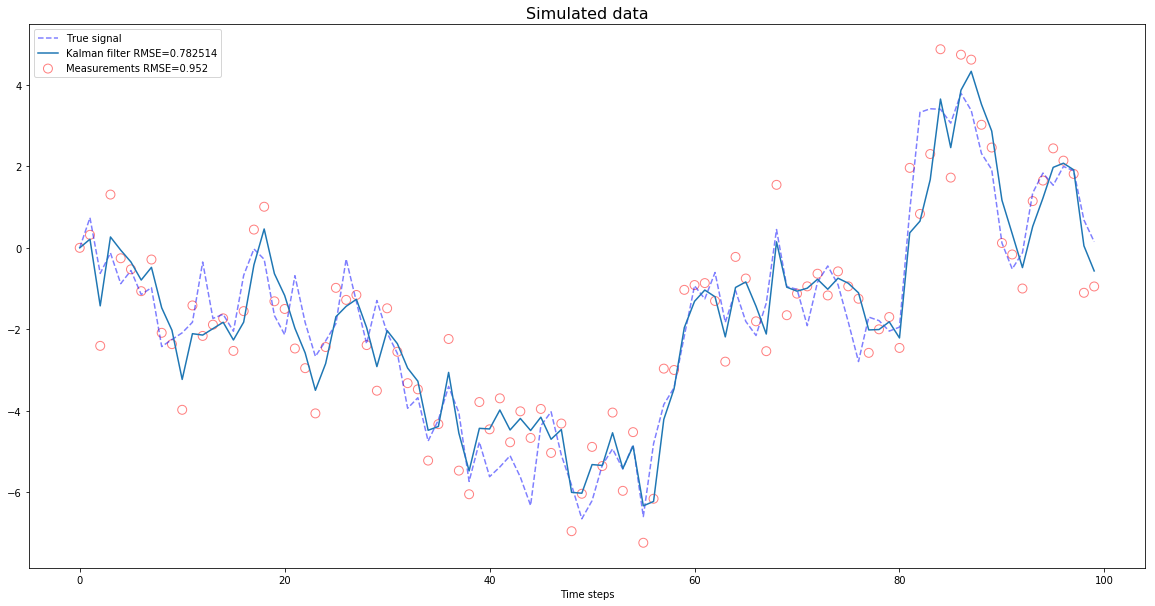

In [172]:
t = np.linspace(0,N-1,N)
plt.figure(figsize=(20,10))
plt.title("Simulated data", fontsize=16)
plt.scatter(x=t,y=y_k.flatten(),label = 'Measurements RMSE={:0.3f}'.format(np.sqrt(mean_squared_error(x_k,y_k)))
            ,s=80, facecolors='none', edgecolors='r',alpha=0.5)
plt.plot(t,x_k,label = "True signal",linestyle='--',color='b',alpha=0.5)
plt.plot(t,m_k,label= "Kalman filter RMSE={:3f}".format(np.sqrt(mean_squared_error(x_k,m_k))))
plt.xlabel('Time steps')
plt.legend()
plt.show()

In [173]:
m_k_s = np.zeros((N,1))
P_k_s = np.zeros((N,1))
m_k_s[N-1] = m_k[N-1]
P_k_s[N-1] = P_k[N-1]
for k in range(N-2,-1,-1):
    m_k_plus_1_ = A @ m_k[k]
    P_k_plus_1_ = A @ P_k[k] @A.T + Q
    G_k = P_k[k]@ A.T @ np.linalg.inv(P_k_plus_1_)
    m_k_s[k] = m_k[k] + G_k @ (m_k_s[k+1] - m_k_plus_1_ )
    P_k_s[k] = P_k[k] + G_k @[P_k_s[k+1] - P_k_plus_1_]@G_k.T

In [174]:
np.sqrt(mean_squared_error(x_k,m_k_s))

0.6724957179617813

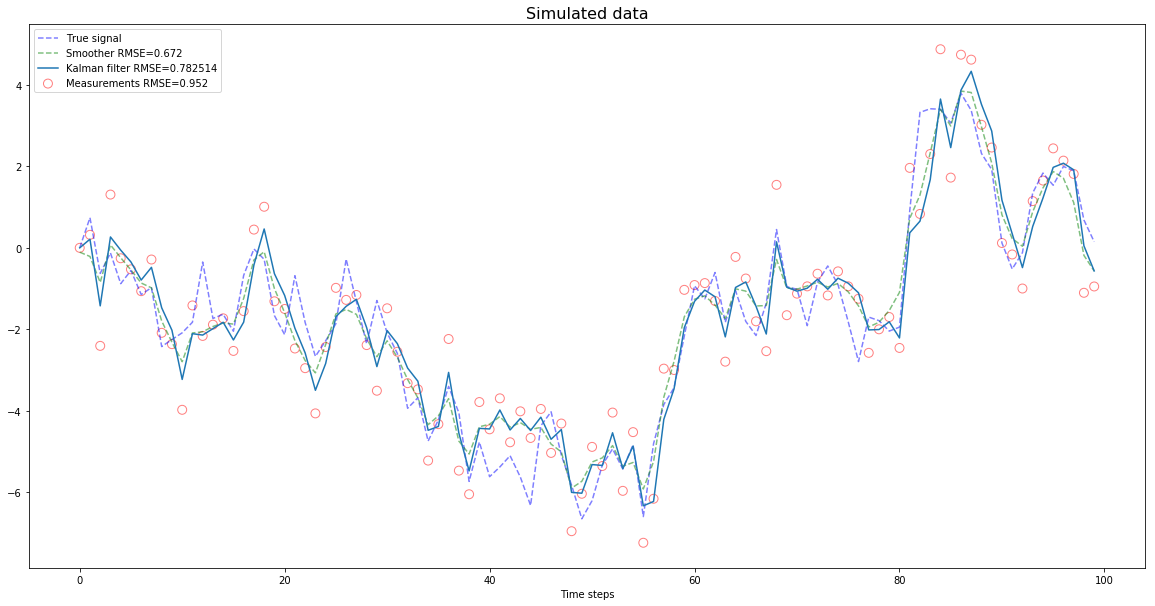

In [175]:
t = np.linspace(0,N-1,N)
plt.figure(figsize=(20,10))
plt.title("Simulated data", fontsize=16)
plt.scatter(x=t,y=y_k.flatten(),label = 'Measurements RMSE={:0.3f}'.format(np.sqrt(mean_squared_error(x_k,y_k))),s=80, facecolors='none', edgecolors='r',alpha=0.5)
plt.plot(t,x_k,label = "True signal",linestyle='--',color='b',alpha=0.5)
plt.plot(t,m_k_s,label = "Smoother RMSE={:0.3f}".format(np.sqrt(mean_squared_error(x_k,m_k_s))),linestyle='--',color='g',alpha=0.5)
plt.plot(t,m_k,label= "Kalman filter RMSE={:3f}".format(np.sqrt(mean_squared_error(x_k,m_k))))
plt.xlabel('Time steps')
plt.legend()
plt.show()

# Exercise 3. (Smoother for Stochastic Resonator)

Consider the following dynamic model:

$$x_k = \begin{pmatrix}
  cos(\omega) & \frac{sin(\omega}{\omega}\\
  - \omega sin(\omega) & cos(\omega)
  \end{pmatrix} x_{k-1} + q_{k-1}$$
  
 $$y_k = \begin{pmatrix}
  1 &  0
  \end{pmatrix} x_{k-1} + r_{k}$$
  
where $x_k \in \mathbb{R}^2$ is the state, $y_k$ is the measurement, $r_k \sim N(0, 0.1)$ is a white
Gaussian measurement noise, and $q_k \sim N(0,Q)$, where

$$Q = \begin{pmatrix}
  \frac{q^c \omega -q^c cos(\omega)sin(\omega)}{2\omega^3} &  \frac{q^c (sin(\omega))^2}{2\omega^2} \\
  \frac{q^c (sin(\omega))^2}{2\omega^2} &  \frac{q^c \omega +q^c cos(\omega)sin(\omega)}{2\omega} 
  \end{pmatrix} $$

In [38]:
import scipy.io as sio
from filterpy.kalman import KalmanFilter
import numpy as np
from scipy.linalg import solve_discrete_are
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [40]:
steps=100
X = sio.loadmat('X.mat')['X']
y = sio.loadmat('Y.mat')['Y']

In [43]:
X = X.swapaxes(0,1)
y = y.reshape(-1,1)

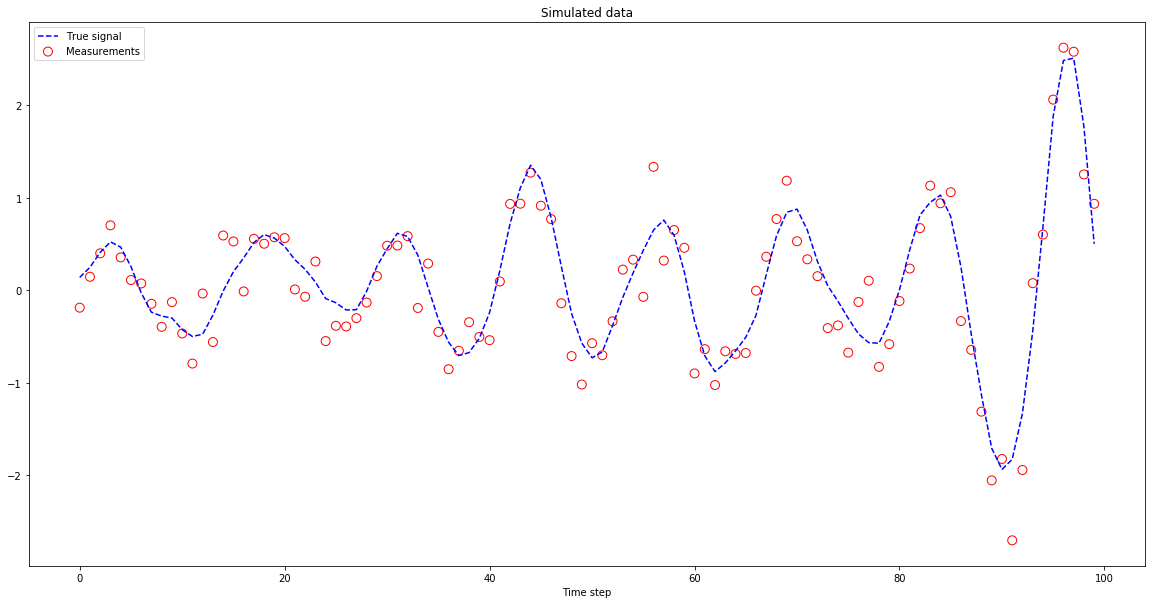

In [44]:
plt.figure(figsize=(20,10))
t = np.linspace(0,steps-1,steps)
plt.scatter(x=t,y=y.flatten(),label = 'Measurements',s=80, facecolors='none', edgecolors='r')
#plt.plot(t,x,label = "True signal",linestyle='--')
plt.plot(t,X[:,0],label = "True signal",linestyle='--',color='b')
plt.title('Simulated data')
plt.xlabel('Time step')
plt.legend()
plt.show()

In [45]:

A = np.array([[np.cos(omega),np.sin(omega)/omega],[-omega*np.sin(omega),np.cos(omega)]])
Q = np.array([[(q_c*omega- q_c*np.cos(omega)*np.sin(omega))/(2*omega**3),
               (q_c*omega*np.sin(omega)**2)/(2*omega**2)]
              ,[(q_c*omega*np.sin(omega)**2)/(2*omega**2),
                (q_c*omega+ q_c*np.cos(omega)*np.sin(omega))/(2*omega)]])
R = np.array([[0.1]])
H = np.array([[1,0]])
m2 = np.array([[0],[1]])
P2 = np.eye(2)
EST2 = np.zeros((steps,2))
for k in range(steps):
    m2_ = A @ m2
    P2_ = A @ P2 @A.T + Q
    v_k = y[k] - H@m2_
    S_k = H@P2_@H.T + R
    K_k = P2_@H.T@np.linalg.inv(S_k)
    m2 = m2_ + K_k @ v_k
    P2 = P2_ - K_k @S_k@K_k.T

# Baseline solution

In [49]:
m1 = np.array([0,1])
m1.shape
EST1 = np.zeros((steps,2))
for k in range(steps):
    m1  = np.array([y[k][0],(y[k]-m1[0])[0]])
    EST1[k] = m1

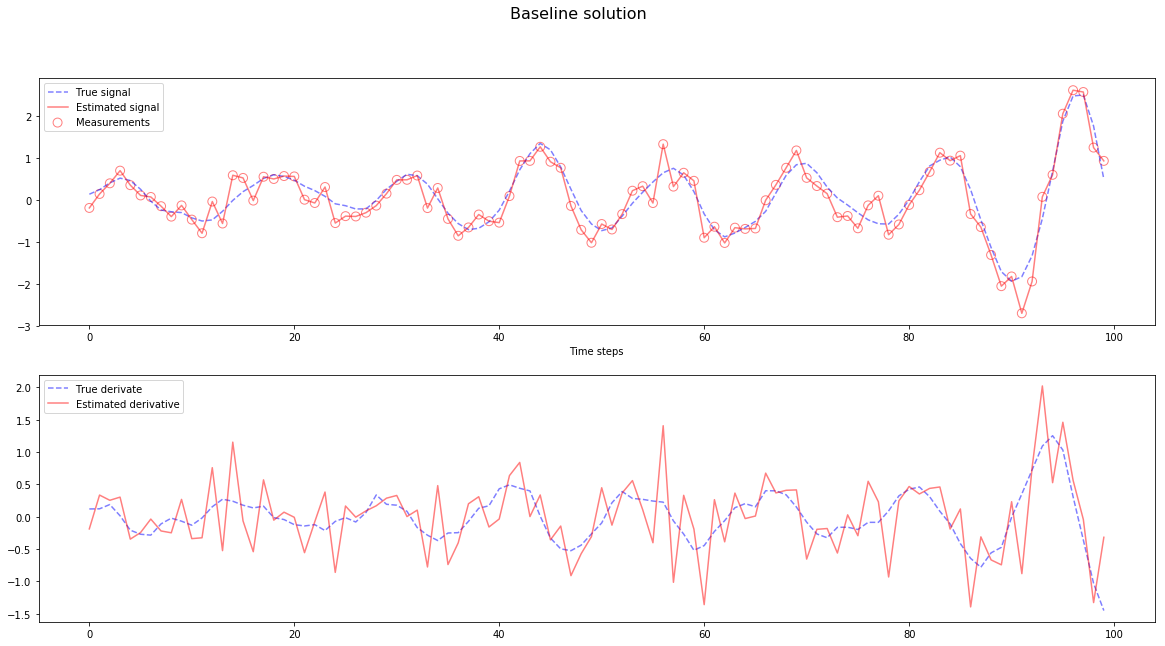

In [50]:
f, (ax1, ax2) = plt.subplots(2, 1,figsize=(20,10))
f.suptitle("Baseline solution", fontsize=16)
ax1.scatter(x=t,y=y.flatten(),label = 'Measurements',s=80, facecolors='none', edgecolors='r',alpha=0.5)
ax1.plot(t,X[:,0],label = "True signal",linestyle='--',color='b',alpha=0.5)
ax1.plot(t,EST1[:,0],label = "Estimated signal",linestyle='-',color='r',alpha=0.5)
ax1.set_xlabel('Time steps')
ax1.legend()


ax2.plot(t,X[:,1],label = "True derivate",linestyle='--',color='b',alpha=0.5)
ax2.plot(t,EST1[:,1],label = "Estimated derivative",linestyle='-',color='r',alpha=0.5)
ax2.legend()
ax1.set_xlabel('Time steps')
plt.show()

In [74]:
#RMSE
np.sqrt(mean_squared_error(X[:,0],EST1[:,0]))

0.30060610594744736

In [92]:
omega = 0.5
q_c  = 0.01
A = np.array([[np.cos(omega),np.sin(omega)/omega],[-omega*np.sin(omega),np.cos(omega)]])
Q = np.array([[(q_c*omega- q_c*np.cos(omega)*np.sin(omega))/(2*omega**3),
               (q_c*omega*np.sin(omega)**2)/(2*omega**2)]
              ,[(q_c*omega*np.sin(omega)**2)/(2*omega**2),
                (q_c*omega+ q_c*np.cos(omega)*np.sin(omega))/(2*omega)]])
R = np.array([[0.1]])
H = np.array([[1,0]])

In [93]:
m_k = np.zeros((steps,2,1))
P_k = np.zeros((steps,2,2))
m_k[0] = np.array([[0],[1]])
P_k[0] = np.eye(2)
for k in range(1,steps):
    m2_ = A @ m_k[k-1]
    P2_ = A @ P_k[k-1] @A.T + Q
    v_k = y[k] - H@m2_
    S_k = H@P2_@H.T + R
    K_k = P2_@H.T@np.linalg.inv(S_k)
    m_k[k] = m2_ + K_k @ v_k
    P_k[k] = P2_ - K_k @S_k@K_k.T
    

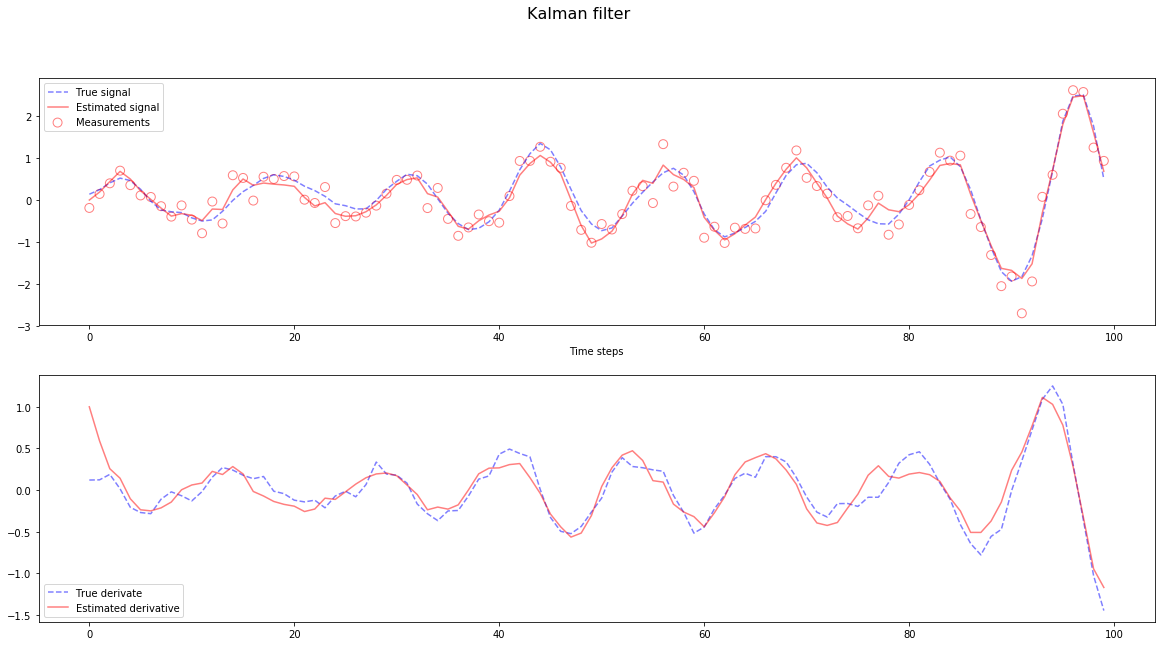

In [87]:
f, (ax1, ax2) = plt.subplots(2, 1,figsize=(20,10))
f.suptitle("Kalman filter", fontsize=16)
ax1.scatter(x=t,y=y.flatten(),label = 'Measurements',s=80, facecolors='none', edgecolors='r',alpha=0.5)
ax1.plot(t,X[:,0],label = "True signal",linestyle='--',color='b',alpha=0.5)
ax1.plot(t,m_k[:,0],label = "Estimated signal",linestyle='-',color='r',alpha=0.5)
ax1.set_xlabel('Time steps')
ax1.legend()


ax2.plot(t,X[:,1],label = "True derivate",linestyle='--',color='b',alpha=0.5)
ax2.plot(t,m_k[:,1],label = "Estimated derivative",linestyle='-',color='r',alpha=0.5)
ax2.legend()
ax1.set_xlabel('Time steps')
plt.show()

In [88]:
#RMSE
np.sqrt(mean_squared_error(X[:,0],m_k[:,0]))

0.19025005985278176

# Smoother

In [113]:
m_k_s = np.zeros((steps,2,1))
P_k_s = np.zeros((steps,2,2))
m_k_s[steps-1] = m_k[steps-1]
P_k_s[steps-1] = P_k[steps-1]
EST2 = np.zeros((steps,2))
for k in range(steps-2,-1,-1):
    m_k_plus_1_ = A @ m_k[k]
    P_k_plus_1_ = A @ P_k[k] @A.T + Q
    G_k = P_k[k]@ A.T @ np.linalg.inv(P_k_plus_1_)
    m_k_s[k] = m_k[k] + G_k @ (m_k_s[k+1] - m_k_plus_1_ )
    P_k_s[k] = P_k[k] + G_k @[P_k_s[k+1] - P_k_plus_1_]@G_k.T

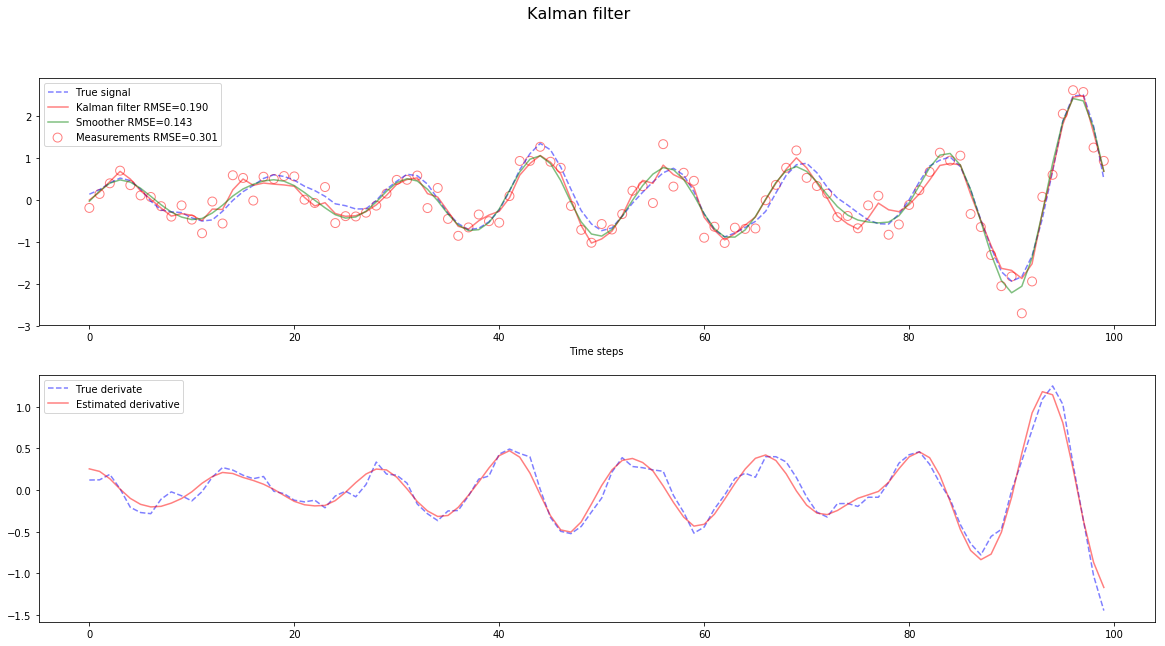

In [121]:
f, (ax1, ax2) = plt.subplots(2, 1,figsize=(20,10))
f.suptitle("Kalman filter", fontsize=16)
ax1.scatter(x=t,y=y.flatten(),label = 'Measurements RMSE={:0.3f}'.format(np.sqrt(mean_squared_error(X[:,0],EST1[:,0])))
            ,s=80, facecolors='none', edgecolors='r',alpha=0.5)
ax1.plot(t,X[:,0],label = "True signal",linestyle='--',color='b',alpha=0.5)
ax1.plot(t,m_k[:,0],label = "Kalman filter RMSE={:0.3f}".format(np.sqrt(mean_squared_error(X[:,0],m_k[:,0])))
         ,linestyle='-',color='r',alpha=0.5)
ax1.plot(t,m_k_s[:,0],label = "Smoother RMSE={:0.3f}".format(np.sqrt(mean_squared_error(X[:,0],m_k_s[:,0])))
         ,linestyle='-',color='g',alpha=0.5)
ax1.set_xlabel('Time steps')
ax1.legend()


ax2.plot(t,X[:,1],label = "True derivate",linestyle='--',color='b',alpha=0.5)
ax2.plot(t,m_k_s[:,1],label = "Estimated derivative",linestyle='-',color='r',alpha=0.5)

ax2.legend()
ax1.set_xlabel('Time steps')
plt.show()

In [117]:
#RMSE
np.sqrt(mean_squared_error(X[:,0],m_k_s[:,0]))

0.14322202849504545